In [1]:
import pandas as pd

# Load the dataset to understand its structure and identify potential insights that could be derived from it
data = pd.read_csv('bahasa.csv')

# Display the first few rows and a summary of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Minggu                   262 non-null    object
 1   PHP: (Indonesia)         262 non-null    int64 
 2   JavaScript: (Indonesia)  262 non-null    int64 
 3   Python: (Indonesia)      262 non-null    int64 
 4   Java: (Indonesia)        262 non-null    int64 
 5   C++: (Indonesia)         262 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.4+ KB


(       Minggu  PHP: (Indonesia)  JavaScript: (Indonesia)  Python: (Indonesia)  \
 0  10/27/2019                98                       57                   54   
 1   11/3/2019                95                       60                   53   
 2  11/10/2019                88                       60                   52   
 3  11/17/2019                95                       58                   54   
 4  11/24/2019                94                       59                   53   
 
    Java: (Indonesia)  C++: (Indonesia)  
 0                 78                52  
 1                 79                45  
 2                 76                46  
 3                 71                48  
 4                 74                45  ,
 None)

<ipython-input-18-b2946a79c1a5>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


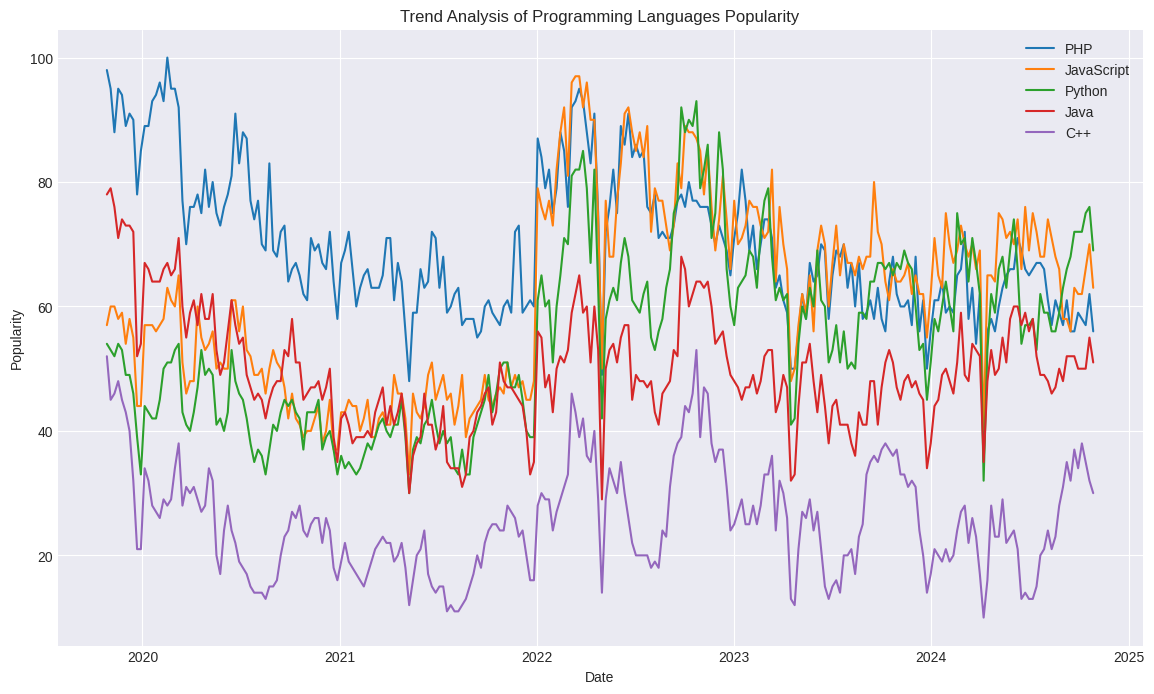

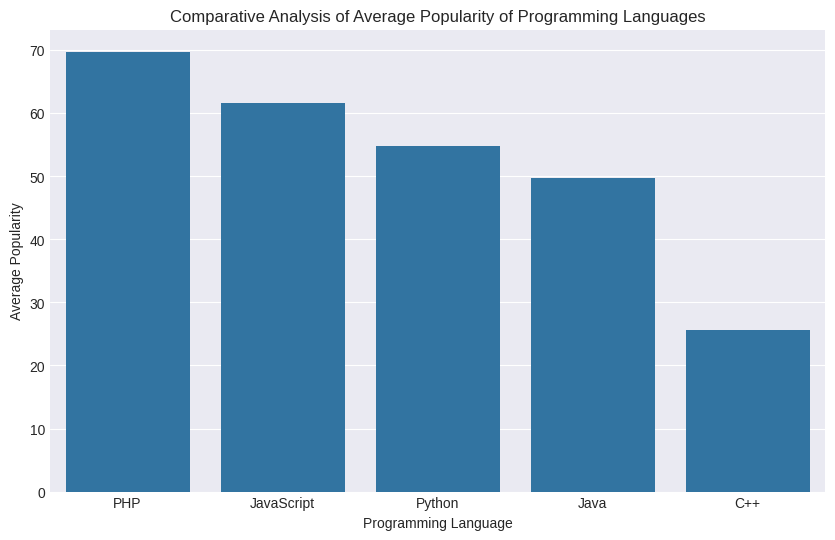

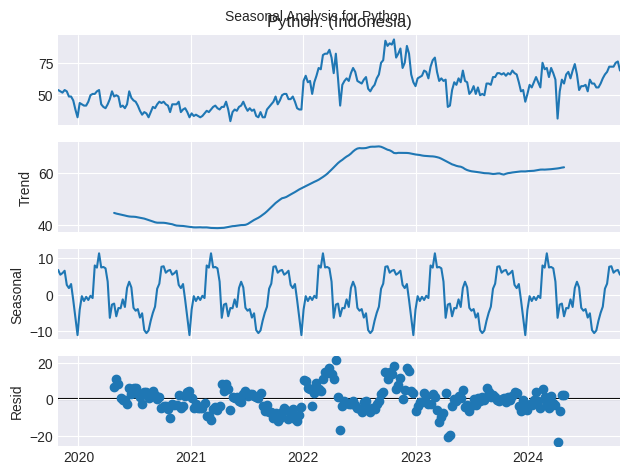

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


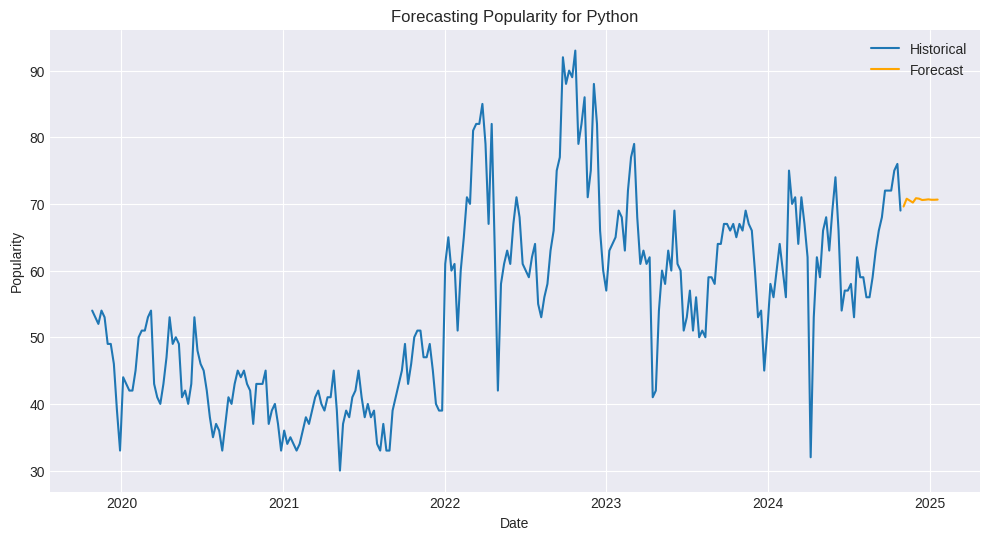

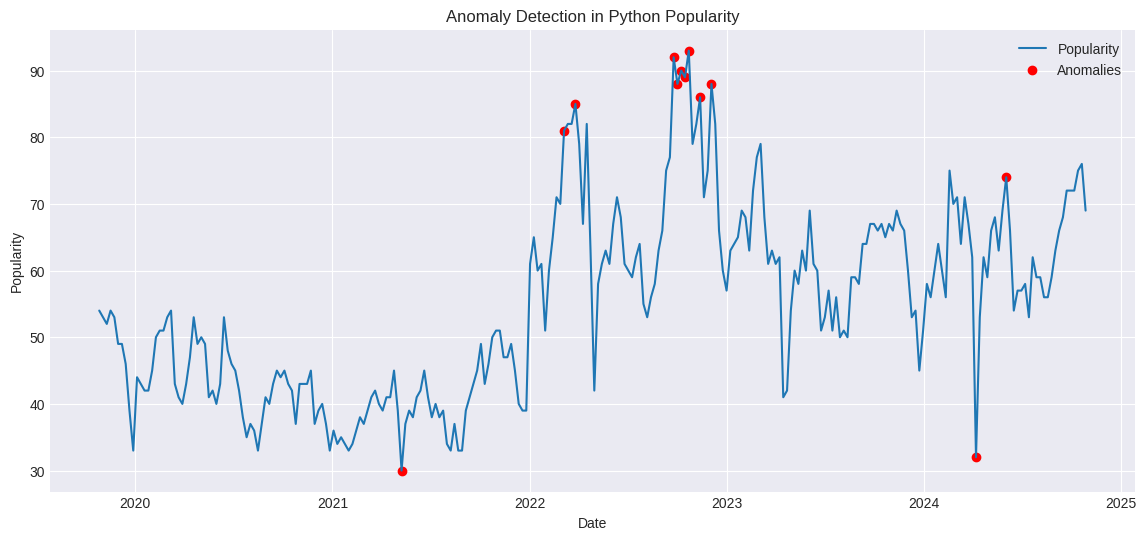

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('bahasa.csv')

# Convert 'Minggu' column to datetime format for time series analysis
data['Minggu'] = pd.to_datetime(data['Minggu'], format='%m/%d/%Y')

# Set 'Minggu' as the index
data.set_index('Minggu', inplace=True)

# Plot settings
plt.style.use('seaborn-darkgrid')

# --- 1. Trend Analysis --- #
def plot_trends(data):
    plt.figure(figsize=(14, 8))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col.split(':')[0])
    plt.title('Trend Analysis of Programming Languages Popularity')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()

# --- 2. Comparative Analysis --- #
def plot_comparative(data):
    plt.figure(figsize=(10, 6))
    avg_popularity = data.mean()
    sns.barplot(x=avg_popularity.index.str.split(':').str[0], y=avg_popularity.values)
    plt.title('Comparative Analysis of Average Popularity of Programming Languages')
    plt.xlabel('Programming Language')
    plt.ylabel('Average Popularity')
    plt.show()

# --- 3. Seasonal/Pattern Analysis --- #
def plot_seasonality(data, language_column):
    result = seasonal_decompose(data[language_column], model='additive', period=52)
    result.plot()
    plt.suptitle(f'Seasonal Analysis for {language_column.split(":")[0]}', fontsize=16)
    plt.show()

# --- 4. Forecasting --- #
def forecast_language(data, language_column, periods=12):
    model = ARIMA(data[language_column], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    plt.figure(figsize=(12, 6))
    plt.plot(data[language_column], label='Historical')
    plt.plot(forecast, label='Forecast', color='orange')
    plt.title(f'Forecasting Popularity for {language_column.split(":")[0]}')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()

# --- 5. Anomaly Detection --- #
def detect_anomalies(data, language_column):
    model = IsolationForest(contamination=0.05, random_state=42)
    data['is_anomaly'] = model.fit_predict(data[[language_column]])
    anomalies = data[data['is_anomaly'] == -1]
    plt.figure(figsize=(14, 6))
    plt.plot(data[language_column], label='Popularity')
    plt.scatter(anomalies.index, anomalies[language_column], color='red', label='Anomalies')
    plt.title(f'Anomaly Detection in {language_column.split(":")[0]} Popularity')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()
    # Drop 'is_anomaly' column after plotting
    data.drop(columns='is_anomaly', inplace=True)

# Run the analyses
plot_trends(data)                         # Trend Analysis
plot_comparative(data)                    # Comparative Analysis
plot_seasonality(data, 'Python: (Indonesia)') # Seasonal/Pattern Analysis for Python
forecast_language(data, 'Python: (Indonesia)') # Forecasting for Python
detect_anomalies(data, 'Python: (Indonesia)')  # Anomaly Detection for Python

<ipython-input-19-8f178cd62231>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


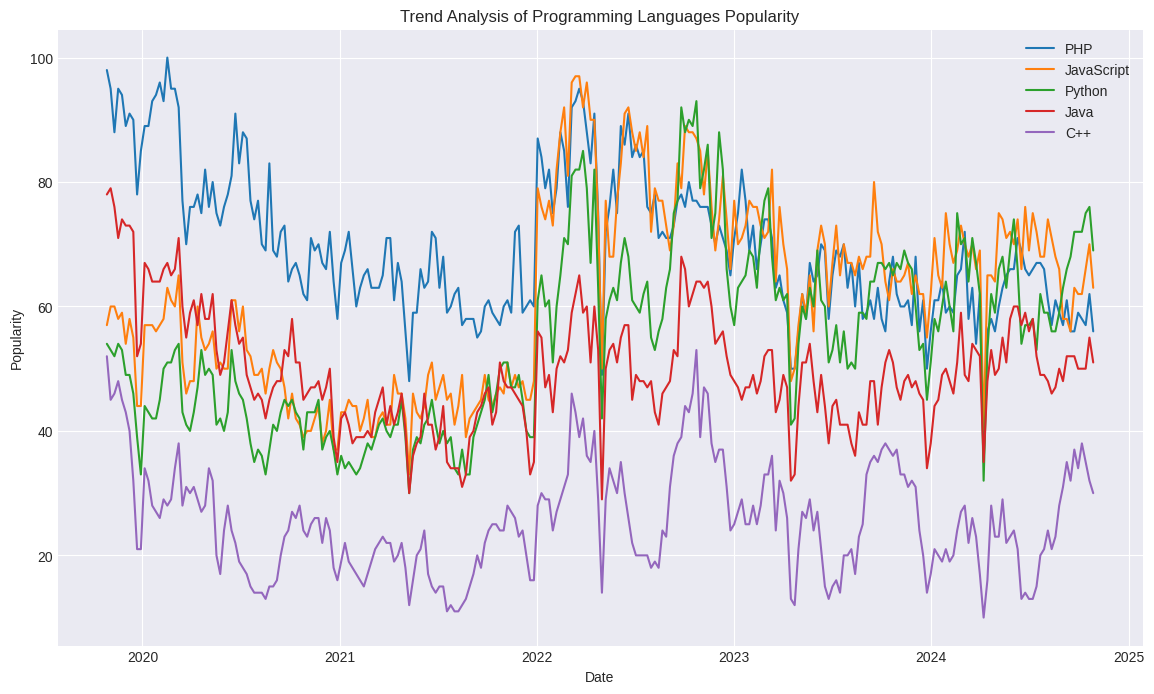

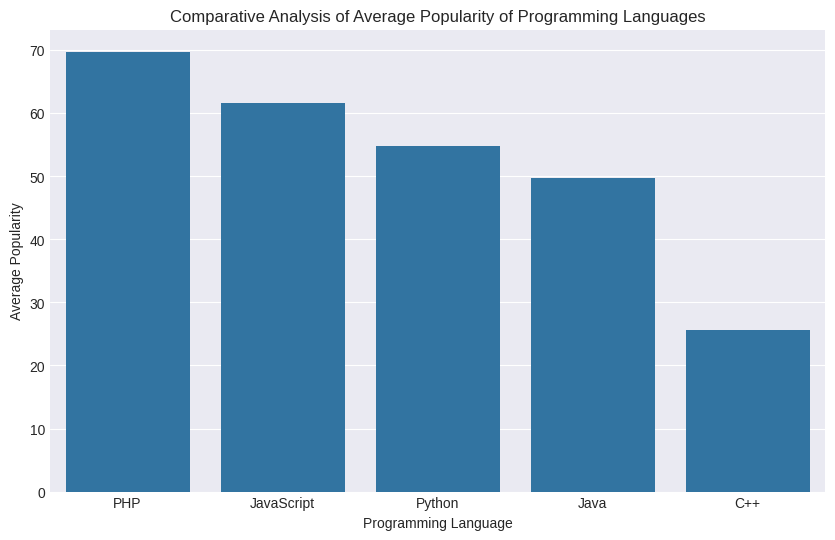

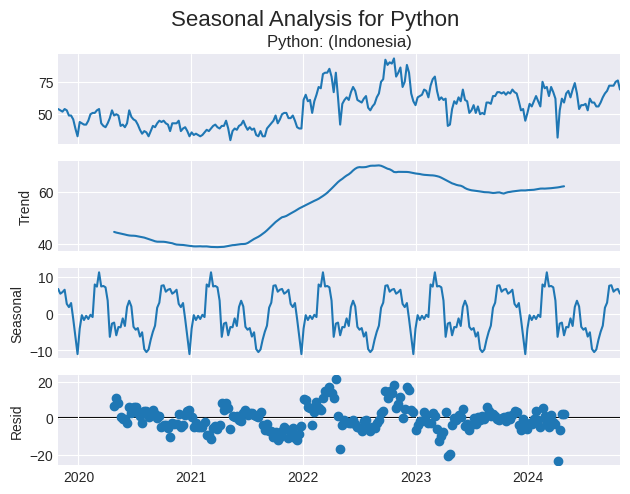

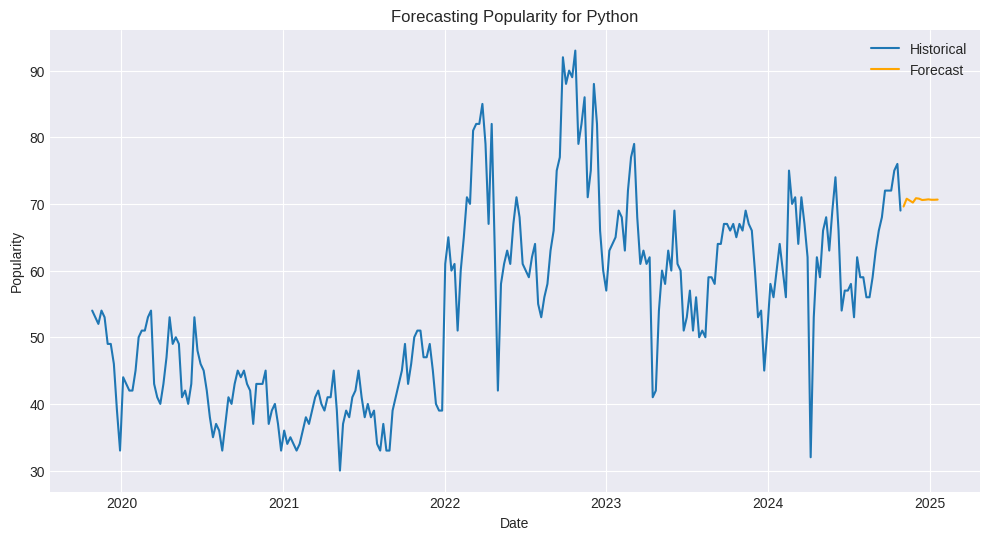

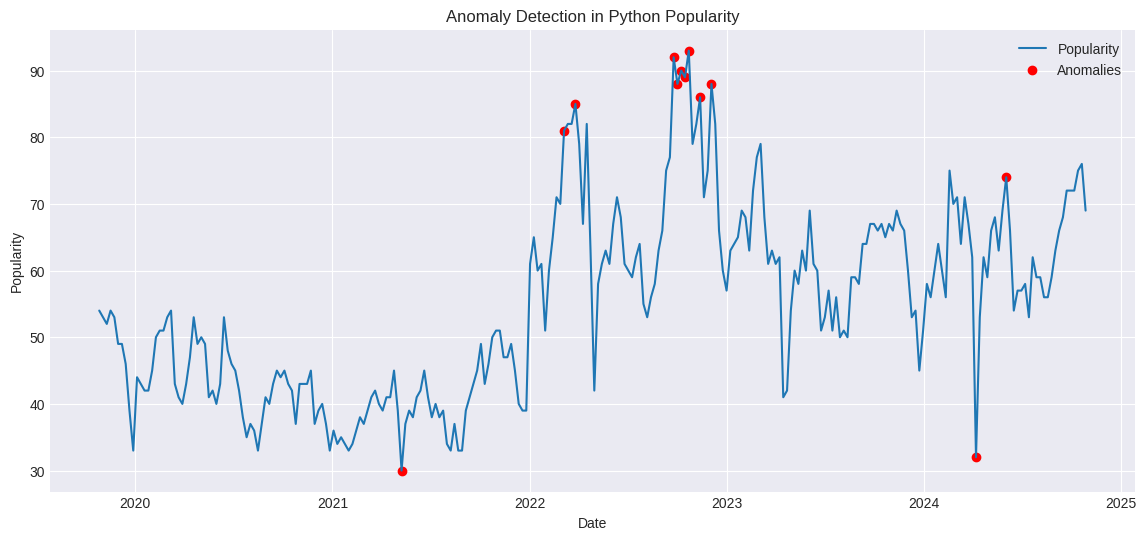

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest
import pandas as pd

# Load the dataset
data = pd.read_csv('bahasa.csv')

# Convert 'Minggu' column to datetime format for time series analysis
data['Minggu'] = pd.to_datetime(data['Minggu'], format='%m/%d/%Y')

# Set 'Minggu' as the index and set frequency to weekly
data.set_index('Minggu', inplace=True)
data = data.asfreq('W')

# Plot settings
plt.style.use('seaborn-darkgrid')

# --- 1. Trend Analysis --- #
def plot_trends(data):
    plt.figure(figsize=(14, 8))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col.split(':')[0])
    plt.title('Trend Analysis of Programming Languages Popularity')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()

# --- 2. Comparative Analysis --- #
def plot_comparative(data):
    plt.figure(figsize=(10, 6))
    avg_popularity = data.mean()
    sns.barplot(x=avg_popularity.index.str.split(':').str[0], y=avg_popularity.values)
    plt.title('Comparative Analysis of Average Popularity of Programming Languages')
    plt.xlabel('Programming Language')
    plt.ylabel('Average Popularity')
    plt.show()

# --- 3. Seasonal/Pattern Analysis --- #
def plot_seasonality(data, language_column):
    result = seasonal_decompose(data[language_column].dropna(), model='additive', period=52)
    fig = result.plot()
    fig.suptitle(f'Seasonal Analysis for {language_column.split(":")[0]}', fontsize=16, y=1.02)  # Adjust y to prevent overlap
    plt.show()

# --- 4. Forecasting --- #
def forecast_language(data, language_column, periods=12):
    model = ARIMA(data[language_column].dropna(), order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    plt.figure(figsize=(12, 6))
    plt.plot(data[language_column], label='Historical')
    plt.plot(forecast, label='Forecast', color='orange')
    plt.title(f'Forecasting Popularity for {language_column.split(":")[0]}')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()

# --- 5. Anomaly Detection --- #
def detect_anomalies(data, language_column):
    model = IsolationForest(contamination=0.05, random_state=42)
    data['is_anomaly'] = model.fit_predict(data[[language_column]].dropna())
    anomalies = data[data['is_anomaly'] == -1]
    plt.figure(figsize=(14, 6))
    plt.plot(data[language_column], label='Popularity')
    plt.scatter(anomalies.index, anomalies[language_column], color='red', label='Anomalies')
    plt.title(f'Anomaly Detection in {language_column.split(":")[0]} Popularity')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()
    # Drop 'is_anomaly' column after plotting
    data.drop(columns='is_anomaly', inplace=True)

# Run the analyses
plot_trends(data)                         # Trend Analysis
plot_comparative(data)                    # Comparative Analysis
plot_seasonality(data, 'Python: (Indonesia)') # Seasonal/Pattern Analysis for Python
forecast_language(data, 'Python: (Indonesia)') # Forecasting for Python
detect_anomalies(data, 'Python: (Indonesia)')  # Anomaly Detection for Python


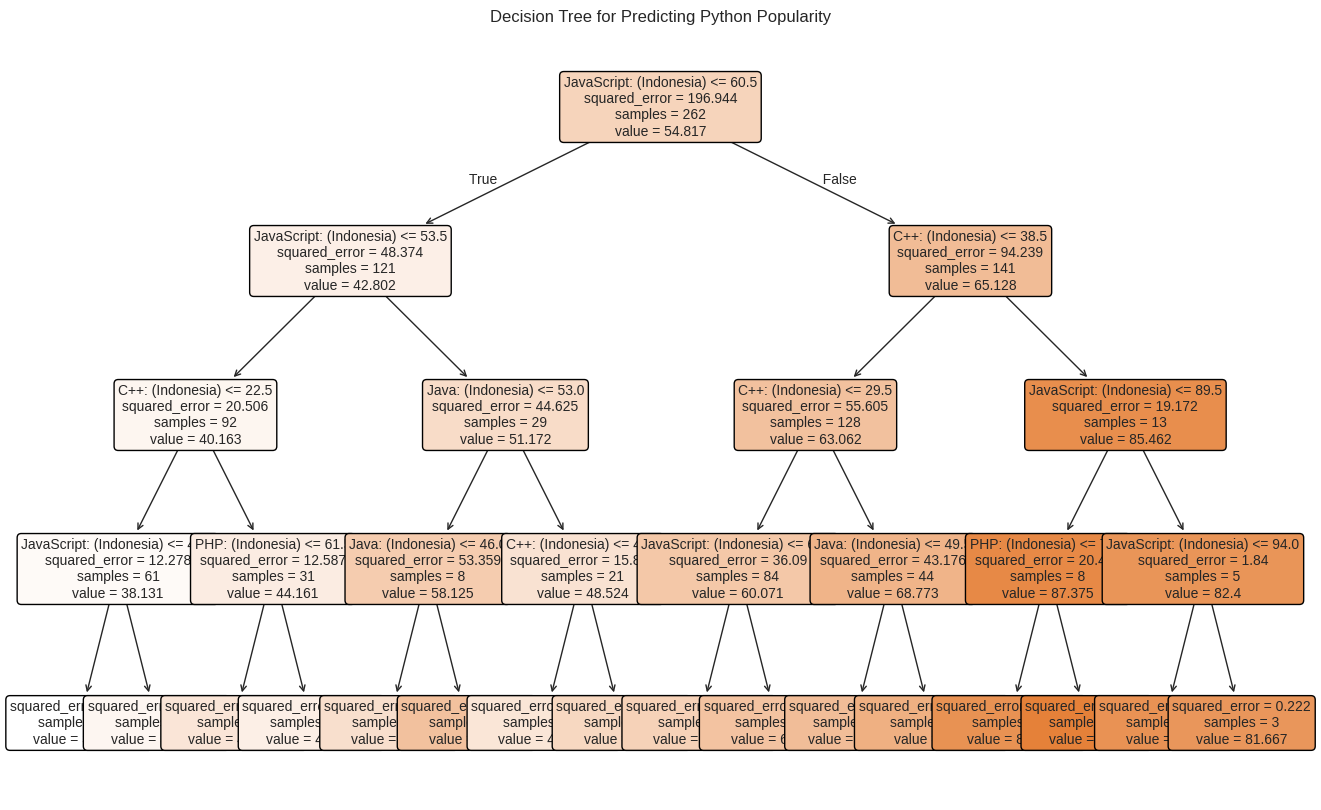

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('bahasa.csv')

# Convert 'Minggu' column to datetime format for time series analysis
data['Minggu'] = pd.to_datetime(data['Minggu'], format='%m/%d/%Y')
data.set_index('Minggu', inplace=True)
data = data.asfreq('W')

# Define the target variable and features
# Predict popularity of Python based on other languages' popularity
X = data[['PHP: (Indonesia)', 'JavaScript: (Indonesia)', 'Java: (Indonesia)', 'C++: (Indonesia)']]
y = data['Python: (Indonesia)']

# Split data into training and testing sets (for simplicity, use full data for fitting)
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Python Popularity")
plt.show()